In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers as tfkl
from tensorflow import keras as tfk

import random
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed = 96

np.random.seed(seed)
tf.random.set_seed(seed);

In [2]:
# LOAD OF DATA SET
data_train = np.load('/kaggle/input/lung-cancer/lung_dataset_padded.npz')
print(data_train)
X_train = data_train['nodules']
y_train = data_train['tumor_classes']

print(X_train.shape, y_train.shape)

NpzFile '/kaggle/input/lung-cancer/lung_dataset_padded.npz' with keys: full_slices, nodules, tumor_classes
(2363, 138, 138) (2363,)


In [3]:
from sklearn.model_selection import train_test_split

y_train = y_train <= 3

In [4]:
def compute_class_weights(y):
    # Calculate the weights inversely proportional to the frequency
    class_counts = np.bincount(y)
    print(class_counts)
    
    total = len(y)
    weights = total / (len(class_counts) * class_counts)
    return dict(enumerate(weights))

class_weights = compute_class_weights(y_train)
print(class_weights)

[ 570 1793]
{0: 2.0728070175438598, 1: 0.6589514779698828}


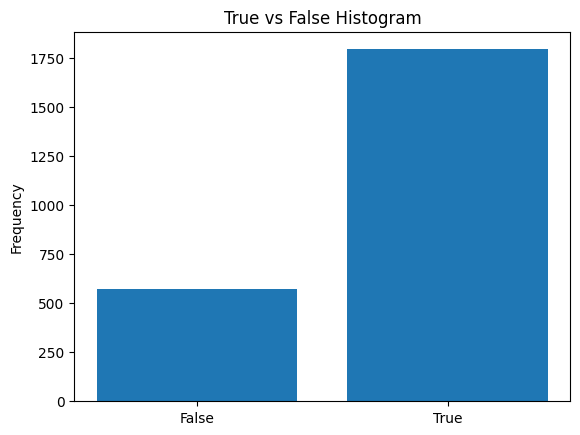

In [5]:
# Conta i valori (False = 0, True = 1)
counts = np.bincount(y_train)  # Conta quanti 0 (False) e 1 (True) ci sono

# Creazione dell'istogramma
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['False', 'True'])  # Etichette sull'asse x
plt.ylabel('Frequency')
plt.title('True vs False Histogram')

plt.show()

In [6]:
indici = np.where(y_train == True)
print(len(indici[0]))
print(indici[0])

1793
[   2    6    7 ... 2357 2358 2359]


In [7]:
random_values = np.random.choice(indici[0], size=570 , replace=False)
print(random_values)

[1529 1242 2275 1083 1006 2249 1360  815 1839  572  101 2232  949 2301
 1958 1742  683  844 1120  954 1483 1455 2112  706  270 2107 1475  741
 2356  974 1115 1906 1701 1044   85 1808 1382 2073 1062   52 1453 1671
 2003 1250 2113  836 1686  334   75 1847   30  500 1752 2149 1561 1707
 2342   32 2036  474 1537  335 2315  153 1801 1927  749 2236  259  737
   72  654 1547  931 1996  676  539 2193  463 2333 2117 2129  199  530
 2033  766 2079 1738  659   27  307 2238 2154 1005 2165 1813  731 1187
 1681 2029 1645  306 1150  498  857 2170 1894  227 1792 1375 1513 1551
 1126  748  935 1376   37 1849   25  740  751  777 1902 1049 2090 1134
 1864 1853 1344  165 1105 1122 2047  138  533 1507  915 2197 1174 2153
 1314 1696  534 1409 2222 1731 1940  555 1365 1500  841 2082  207 2150
 1951 2255 1754 2221 2319 1969 1678  879   58  104 1226  364 1796  527
  550  490  938 2268 1659  157 2168  704 2320 2166 1224 1020 2041 1280
 2072 1565  556  144 1132   21 2006   84 1893 1844 2000 1099 2005 1151
 1640 

In [10]:
X_extracted_true = X_train[random_values]
y_extracted_true = y_train[random_values]

indici_false = np.where(y_train == False)

X_extracted_false = X_train[indici_false[0]]
y_extracted_false = y_train[indici_false[0]]


X_combined = np.concatenate((X_extracted_true, X_extracted_false), axis=0)
del X_extracted_true, X_extracted_false
y_combined = np.concatenate((y_extracted_true, y_extracted_false), axis=0)
del y_extracted_true, y_extracted_false, y_train

# Creare una permutazione casuale degli indici
indices = np.random.permutation(len(y_combined))

# Applicare lo shuffle
X_shuffled = X_combined[indices]
y_shuffled = y_combined[indices]

In [11]:
y_train = np.array([[0, 1] if val else [1, 0] for val in y_shuffled])

X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_train, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

(912, 138, 138) (912, 2)


In [12]:
def plot_image(img, num_images = 30, images_per_row = 10):
    list_numer = list(range(0, img.shape[0]))
    
    # Randomly select image keys
    selected_keys = random.sample(list_numer, num_images)
    
    # Calculate the number of rows needed
    num_rows = int(np.ceil(num_images / images_per_row))
    
    # Create the figure with the appropriate dimensions
    plt.figure(figsize=(20, 4 * num_rows))
    
    for idx, key in enumerate(selected_keys):
        plt.subplot(num_rows, images_per_row, idx + 1)
        plt.imshow(img[key], cmap='gray')
        plt.axis('off')
        plt.title(f'Image {idx + 1}')
    

    plt.tight_layout()
    plt.show()

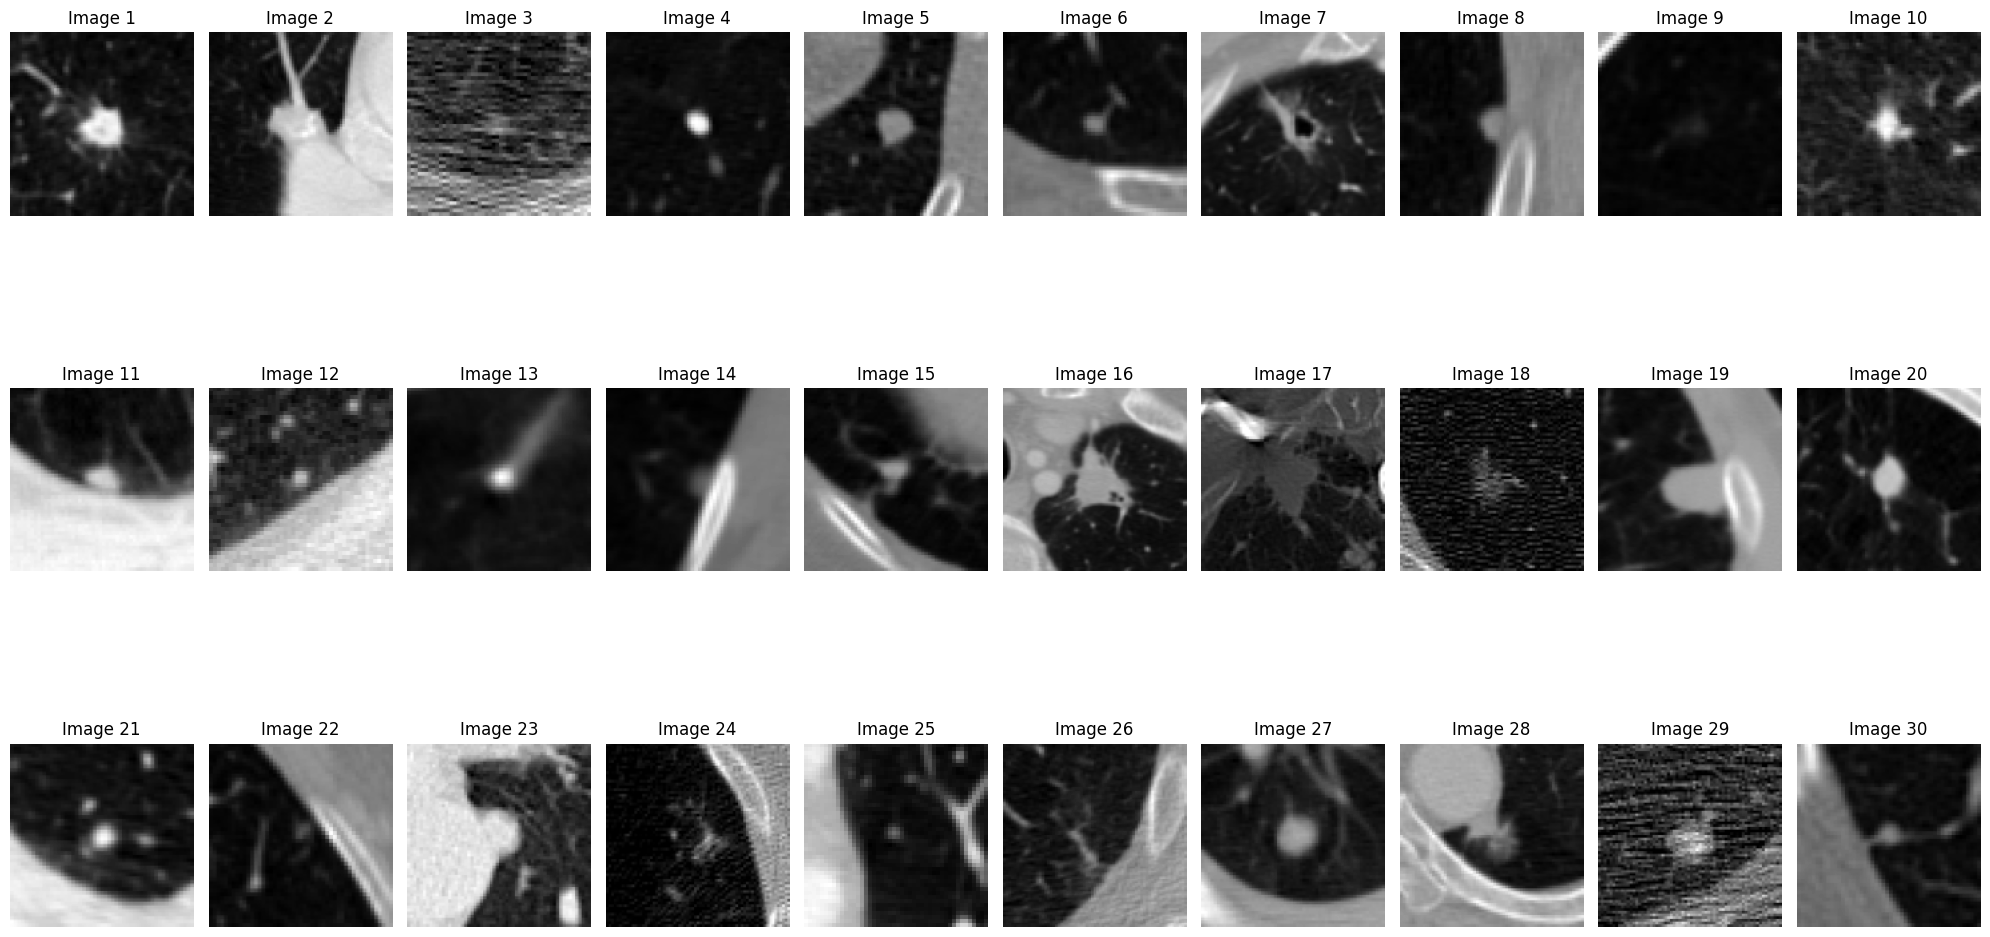

In [13]:
plot_image(X_train)
# plot_image(X_val)

In [14]:
count_true = np.sum(y_train == [0,1]) 
count_false = np.sum(y_train == [1,0])

print(count_true, count_false)

928 896


In [15]:
def compute_class_weights(y):
    # Calculate the weights inversely proportional to the frequency

    boolean_array = np.array([row[1] == 1 for row in y])
    
    class_counts = np.bincount(boolean_array.flatten())
    total = len(y)
    weights = total / (len(class_counts) * class_counts)
    return dict(enumerate(weights))

weights = compute_class_weights(y_train)
print(weights)

{0: 1.0178571428571428, 1: 0.9827586206896551}


In [18]:
print(X_train[0])
min = np.min(X_train)
max = np.max(X_train)

print(min, max)

print(X_train.shape)

#X_train = X_train.reshape(-1, 1)
#print(X_train.shape)

#X_train = np.repeat(X_train, repeats=3, axis=-1)
X_train = np.repeat(X_train[:, :, :, np.newaxis], repeats=3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], repeats=3, axis=-1)
print(X_train.shape)
print(X_test.shape)

[[ -64  -64  -81 ... -935 -923 -923]
 [ -64  -64  -81 ... -935 -923 -923]
 [ -43  -43  -65 ... -865 -859 -859]
 ...
 [ -10  -10  146 ... -874 -880 -880]
 [ -53  -53   59 ... -851 -831 -831]
 [ -53  -53   59 ... -851 -831 -831]]
-3024 3071
(912, 138, 138)
(912, 138, 138, 3)
(228, 138, 138, 3)


In [19]:
# Number of training epochs
epochs = 1000

# Batch size for training
batch_size = 16

# Learning rate: step size for updating the model's weights
learning_rate = 1e-3


print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 1000
Batch Size: 16
Learning Rare: 0.001


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import layers as tfkl
from tensorflow.keras import optimizers as op
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def build_model(
    input_shape,
    output_shape,
    learning_rate = learning_rate,
    seed=seed
):


    inputs = tfkl.Input(shape=input_shape, name='Input',  batch_size=1)

    inputs_processed = preprocess_input(inputs)
    
    # Download the ResNet50 Model
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        classes=output_shape,
        classifier_activation='sigmoid',
        input_tensor=inputs_processed
    )


    base_model.trainable = True

    number_layers = len(base_model.layers)
    print("number_layers: ", number_layers)

    non_trainble_layers = int(0.5 * number_layers)
    print("non_trainble_layers: ", non_trainble_layers)

    for layer in base_model.layers[:non_trainble_layers]:
        layer.trainable = False

    for layer in base_model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.trainable = False


    x = layers.GlobalAveragePooling2D(name='gap')(base_model.output)

    # DROPOUT
    # x = tfkl.Dropout(0.3, name='dropout')(x)
    

    # OUTPUT LAYER CLASSIFICATION
    outputs = tfkl.Dense(units=output_shape, name='dense_output', activation = 'sigmoid')(x)


    final_model = tfk.Model(inputs=inputs, outputs=outputs, name='ResNet50')

    optimizer = tfk.optimizers.Adam(learning_rate)
    metrics = ['accuracy']


    final_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)


    return final_model

In [21]:
patience = 20

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

checkpointer = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/checkpoint_ResNet50.keras', verbose=1, save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',     # Monitor the loss on the validation set.
    factor=0.5,             # Reduces LR by a factor of 0.5 (halves it).
    patience=5,            # Wait 10 epochs with no improvements before reducing the LR.
    min_delta=1e-4,         # Only consider improvements > 0.0001.
    min_lr=1e-7            # Does not reduce LR below 1e-6.
)

# Store the callback in a list
callbacks = [early_stopping, checkpointer, reduce_lr]

In [22]:
# Train the model with early stopping callback
input_shape = X_train.shape[1:]


# y_train = y_train.reshape(-1, 1)
print(y_train.shape)
# Output shape for the model
output_shape = y_train.shape[1]

print(input_shape, output_shape)

final_model = build_model(input_shape=input_shape, output_shape=output_shape)

(912, 2)
(138, 138, 3) 2
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
number_layers:  175
non_trainble_layers:  87


In [23]:
from tensorflow.keras import utils as ut

final_model.summary(expand_nested=True)

# ut.plot_model(final_model, expand_nested=False, show_trainable=True, show_shapes=True, dpi=60)

Model: "ResNet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)        │ (1, 138, 138, 3)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (1, 138, 138)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (1, 138, 138)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (1, 138, 138)          │              0 │ Input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (1, 138, 138, 3)       │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (1, 138, 138, 3)       │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (1, 144, 144, 3)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (1, 69, 69, 64)        │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (1, 69, 69, 64)        │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (1, 69, 69, 64)        │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (1, 71, 71, 64)        │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (1, 35, 35, 64)        │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (1, 35, 35, 64)        │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (1, 35, 35, 64)        │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (1, 35, 35, 64)        │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (1, 35, 35, 64)        │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 21,324,290 (81.35 MB)

 Non-trainable params: 2,267,520 (8.65 MB)

In [24]:
history = final_model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks
).history

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5242 - loss: 40.1509
Epoch 1: val_loss improved from inf to 1.00288, saving model to /kaggle/working/checkpoint_ResNet50.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 33s 330ms/step - accuracy: 0.5242 - loss: 39.5722 - val_accuracy: 0.4754 - val_loss: 1.0029 - learning_rate: 0.0010
Epoch 2/1000
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5025 - loss: 0.7541
Epoch 2: val_loss improved from 1.00288 to 0.69238, saving model to /kaggle/working/checkpoint_ResNet50.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5029 - loss: 0.7527 - val_accuracy: 0.5027 - val_loss: 0.6924 - learning_rate: 0.0010
Epoch 3/1000
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5645 - loss: 0.6810
Epoch 3: val_loss improved from 0.69238 to 0.58930, saving model to /kaggle/working/checkpoint_ResNet50.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.5648 - loss: 0.6806 - val_accuracy: 0.6776 - val_loss: 0.5893 - learning_r

In [25]:
# Calculate and print the final validation accuracy
final_val_accuracy = round(np.max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

import datetime
now = datetime.datetime.now()

# Format as Day-Month-HH:min
date_time_str = now.strftime("%d-%m-%H:%M")


model_filename = './ResNet50_accuracy_nodules_'+str(final_val_accuracy)+'_'+date_time_str+'.keras'
final_model.save(model_filename)

Final validation accuracy: 73.22%


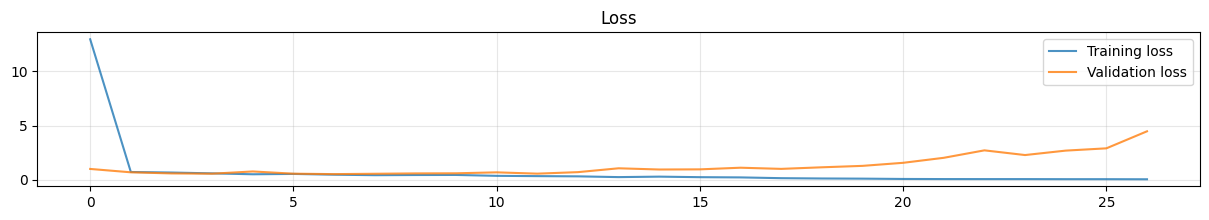

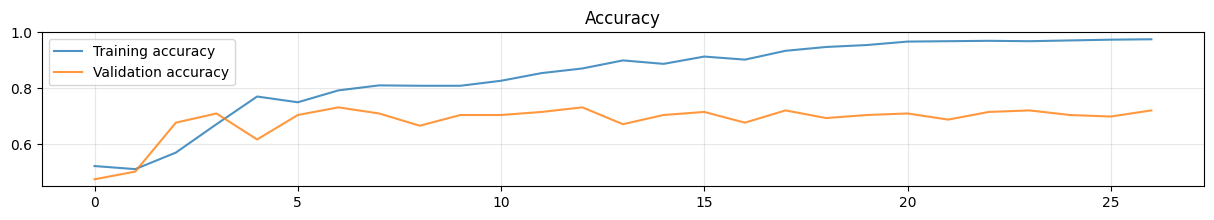

In [26]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [27]:
# Predict labels for the entire test set
predictions = final_model.predict(X_test, verbose=0)

# Display the shape of the predictions
print("Predictions Shape:", predictions.shape)

predictions = np.argmax(predictions, axis=1)

print("Predictions Shape:", predictions.shape)

y_test = np.argmax(y_test, axis=1)


Predictions Shape: (228, 2)
Predictions Shape: (228,)


Accuracy score over the test set: 0.7456
Precision score over the test set: 0.7472
Recall score over the test set: 0.7456
F1 score over the test set: 0.7459


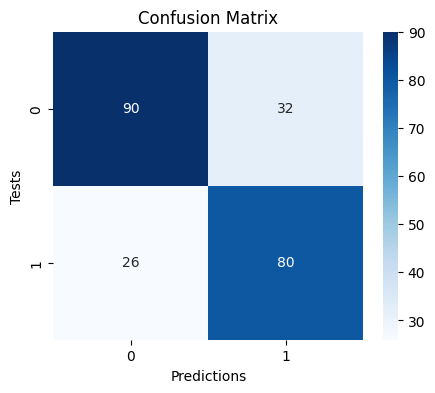

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec

# Calculate and display test set accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Calculate and display test set precision
precision = precision_score(y_test, predictions, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Calculate and display test set recall
recall = recall_score(y_test, predictions, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Calculate and display test set F1 score
f1 = f1_score(y_test, predictions, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Combine numbers and percentages into a single string for annotation
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Tests')
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import seaborn as sns

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_roc_curve(model, X_test, y_test, title="ROC Curve"):
    
    y_pred_proba = model.predict(X_test)

    y_pred_proba = y_pred_proba[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 8))
    sns.set_style("whitegrid")
    
    
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random classifier')
    
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    
    return roc_auc

def analyze_thresholds(model, X_test, y_test, n_thresholds=10):
    
    y_pred_proba = model.predict(X_test)

    y_pred_proba = y_pred_proba[:, 1]
    
    thresholds = np.linspace(0.1, 0.9, n_thresholds)
    
    results = []
    for threshold in thresholds:
        
        y_pred = (y_pred_proba >= threshold).astype(int)
        
       
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })
    
    return pd.DataFrame(results)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


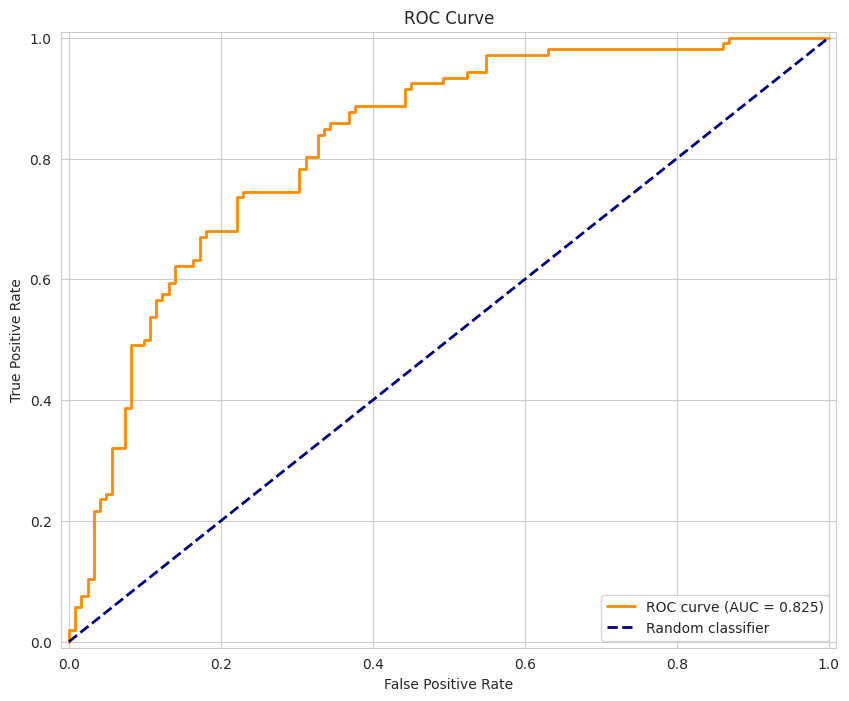


Auc_score: 0.8250077327559543
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Threshold analysis:
   threshold  precision    recall  f1_score
0   0.100000   0.464912  1.000000  0.634731
1   0.188889   0.473214  1.000000  0.642424
2   0.277778   0.527919  0.981132  0.686469
3   0.366667   0.620253  0.924528  0.742424
4   0.455556   0.679104  0.858491  0.758333
5   0.544444   0.711712  0.745283  0.728111
6   0.633333   0.804348  0.349057  0.486842
7   0.722222   0.851852  0.216981  0.345865
8   0.811111   0.800000  0.075472  0.137931
9   0.900000   1.000000  0.018868  0.037037


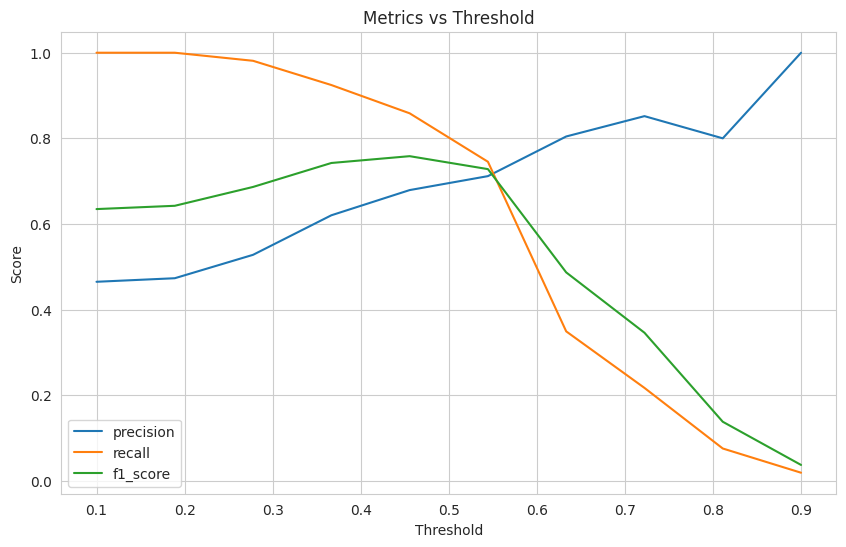

In [30]:

auc_score = plot_roc_curve(final_model, X_test, y_test)
plt.show()

print("\nAuc_score:", auc_score)
    

threshold_analysis = analyze_thresholds(final_model, X_test, y_test)
print("\nThreshold analysis:")
print(threshold_analysis)
    

plt.figure(figsize=(10, 6))
for metric in ['precision', 'recall', 'f1_score']:
    plt.plot(threshold_analysis['threshold'], 
                threshold_analysis[metric], 
                label=metric)
    
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# COSTRUZIONE DEL CAM

import scipy

def compute_CAM(model, img):
    # print(img.shape)
    img = np.expand_dims(img, axis=0)
    
    predictions = model.predict(img, verbose=0)
    label_index = np.argmax(predictions)
    
    class_weights = model.layers[-1].get_weights()[0]

    final_conv_layer = tfk.Model(
        model.input,
        model.get_layer('conv5_block3_out').output
    )

    class_weights_winner = class_weights[:, label_index]

    conv_outputs = final_conv_layer(img)
    conv_outputs = np.squeeze(conv_outputs)

    # HERE THE DIMENSION IS 5X5 -> 140
    # Upsample the convolutional outputs
    mat_for_mult = scipy.ndimage.zoom(conv_outputs, (28, 28, 1), order=1)
    # Flatten the spatial dimension
    mat_for_mult = mat_for_mult.reshape((140*140, 2048))

    final_output = np.dot(mat_for_mult, class_weights_winner)

    final_output = final_output.reshape(140,140)

    return final_output

In [32]:
cam_image = []
num_img  = 100

for num in range(0, num_img):
    print(num)
    img = X_test[num]
    cam_img = compute_CAM(final_model, img)
    cam_image.append(cam_img)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


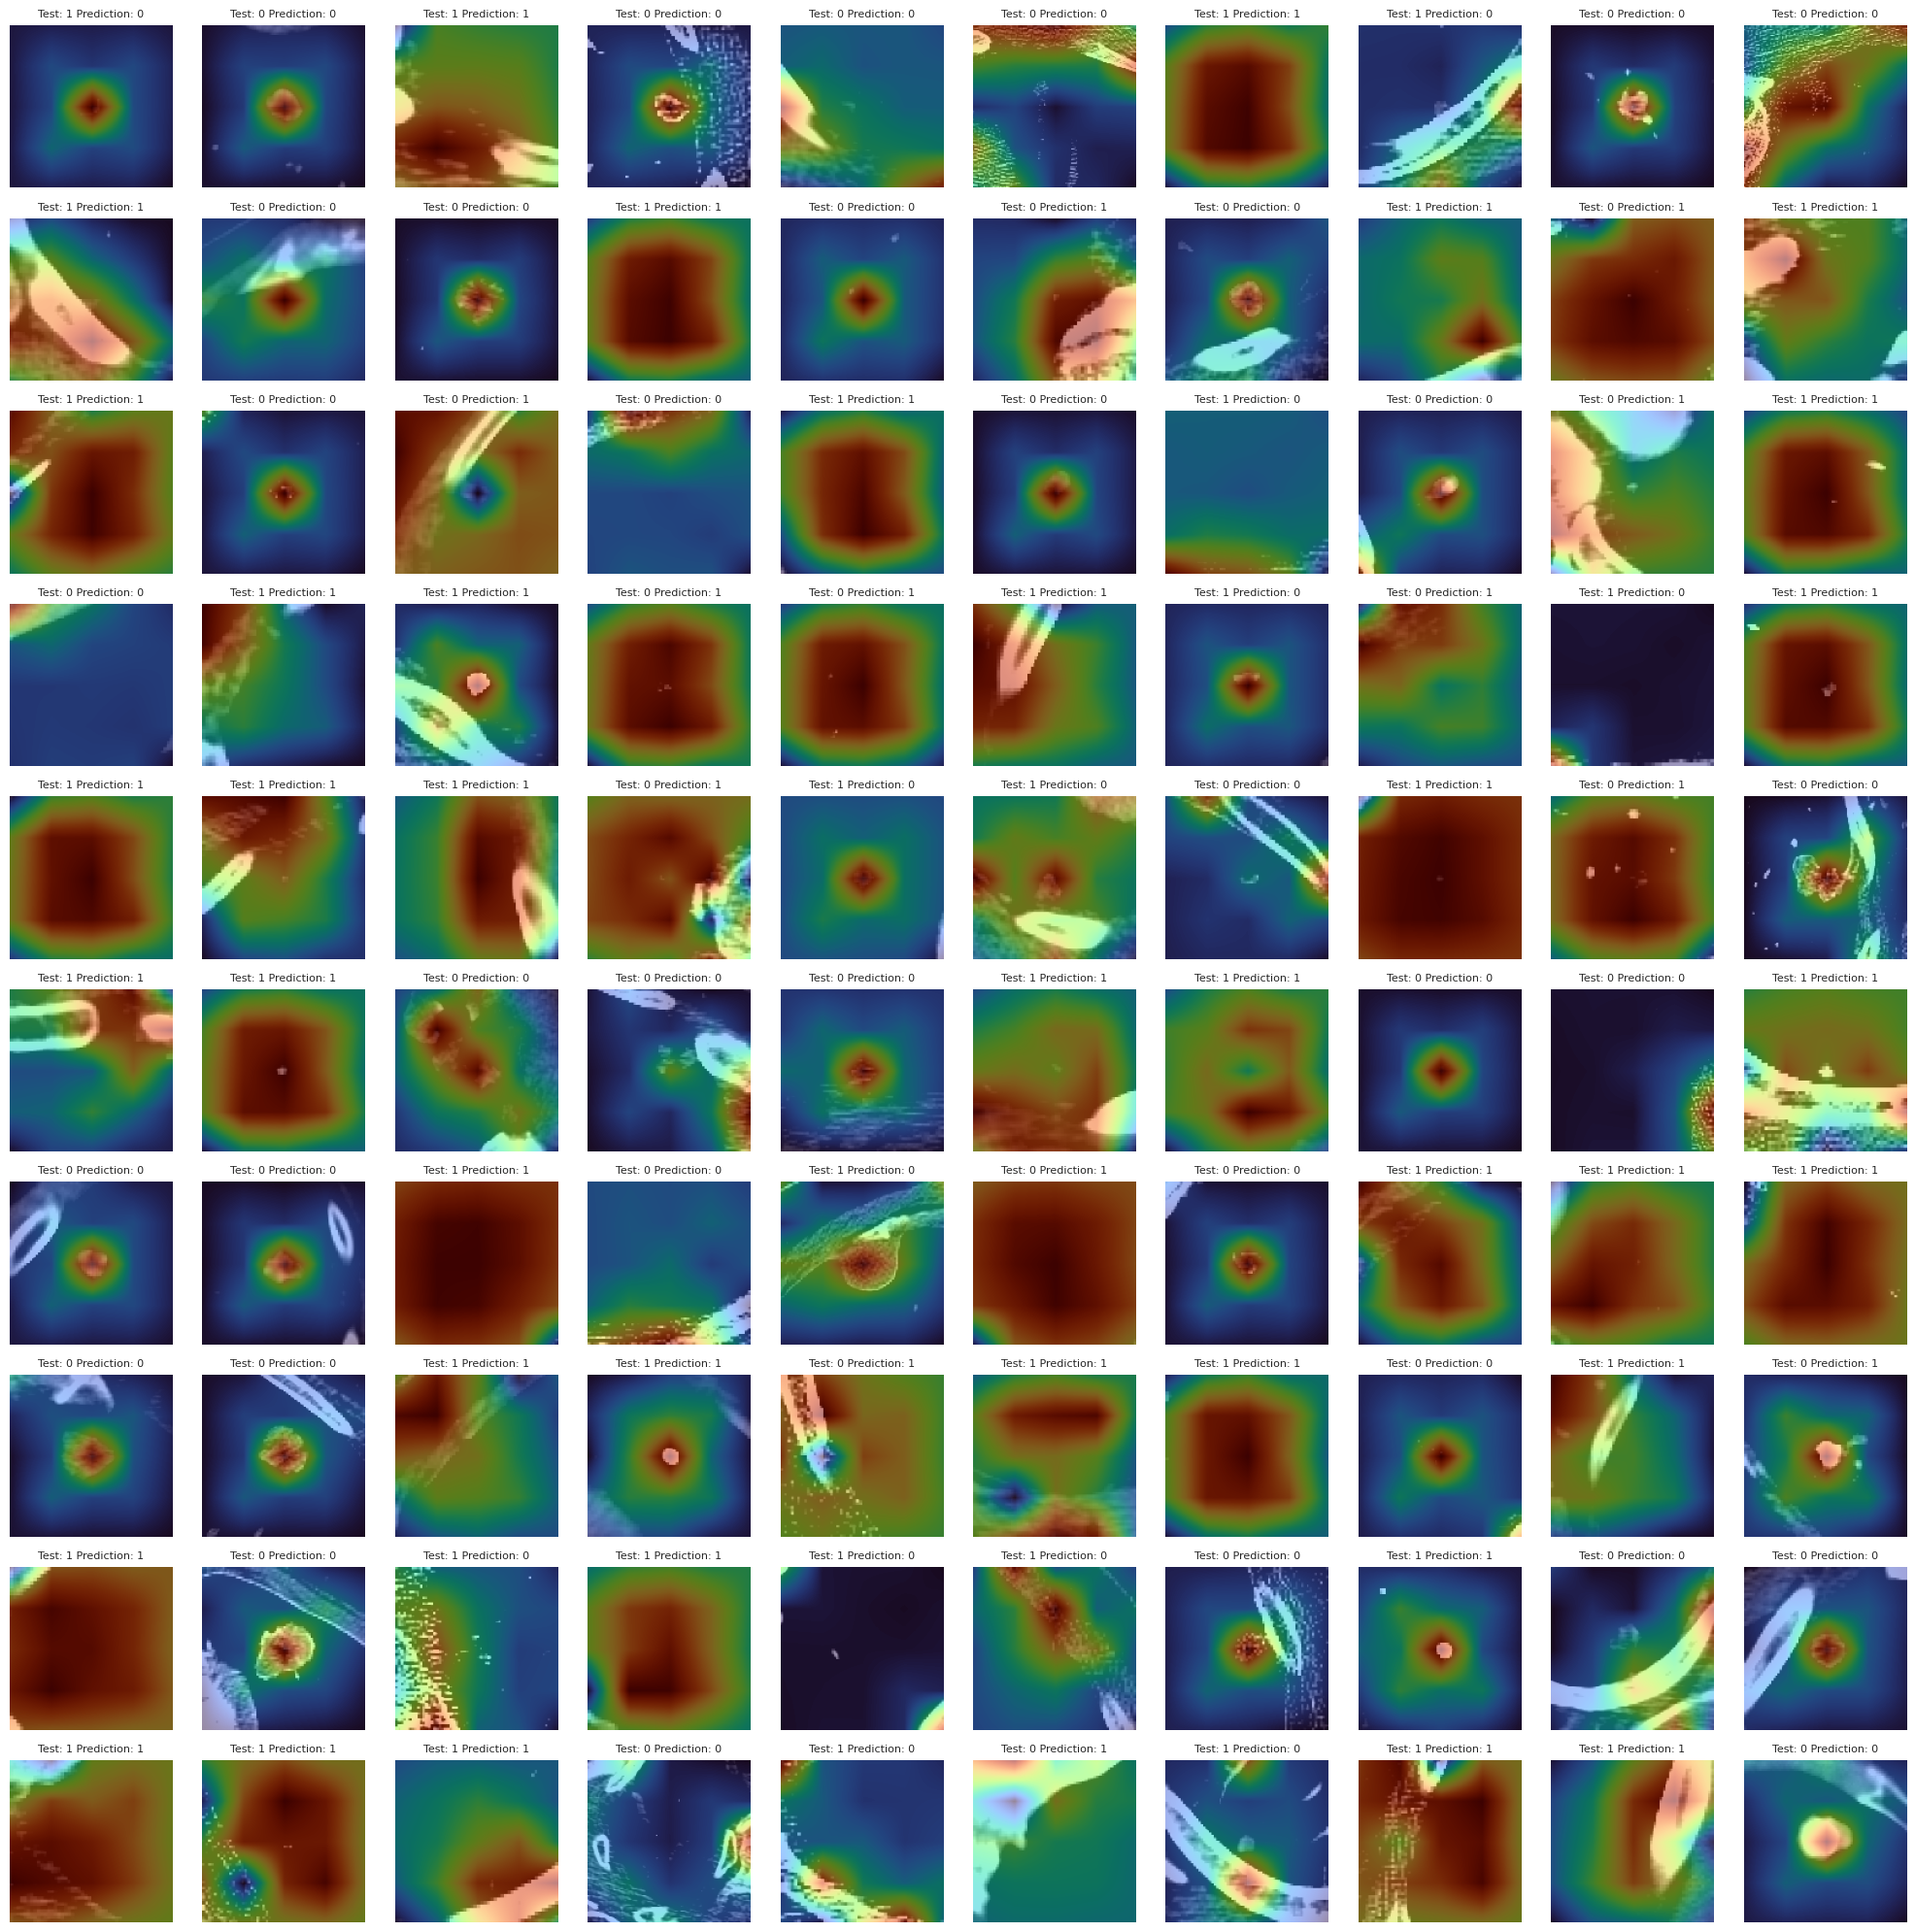

In [33]:
fig, axes = plt.subplots(10, num_img//10, figsize=(20,20))

for i in range(num_img):
    ax = axes[i%10,i%num_img//10]
    ax.imshow(cam_image[i], cmap='turbo')
    ax.imshow(X_test[i], cmap='gray', alpha=0.5)
    ax.axis('off')
    ax.set_title(f"Test: {y_test[i]} Prediction: {predictions[i]}", fontsize=8)
plt.tight_layout()
plt.show()